In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV

from sklearn.metrics import mean_squared_error

In [3]:
mlb = pd.read_csv('mlb.csv').dropna()
mlb

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
X = mlb[mlb.columns[:-1]]
y = mlb.Salary

In [5]:
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [6]:
X.drop(columns = ['League','Division','Salary'],axis= 1,inplace= True)

C:\Users\Shree\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [52]:
reg = Lasso(alpha = 1, max_iter=3000)
reg.fit(X_train, y_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190369.7876969017, tolerance: 4296.874369048249
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1, max_iter=3000)

In [53]:
reg = Lasso(alpha = 1, max_iter=4000)
reg.fit(X_train, y_train)

Lasso(alpha=1, max_iter=4000)

In [54]:
print('Coefficient is:',reg.coef_)

Coefficient is: [-2.28846436  8.9008322   3.69481829 -2.05897395 -1.06775709  6.75708309
  0.7936048  -0.18407791 -0.02177752 -0.53437267  1.61721736  0.97549583
 -0.74106732  0.23403311  0.39935109 -2.19096376]


In [55]:
print('Interception is:',reg.intercept_)

Interception is: 78.10671956781039


C:\Users\Shree\AppData\Local\Temp/ipykernel_26792/2165577371.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10381053.199691918, tolerance: 4296.874369048249
  model = cd_fast.enet_coordinate_descent(


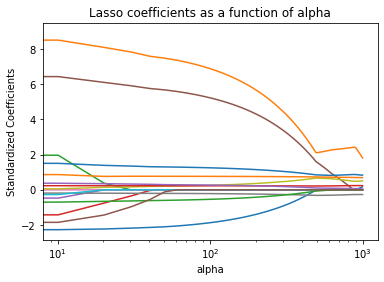

In [56]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0,1000,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [47]:
lasso.predict(X_test[0:5])

array([556.73549036, 332.54308523, 192.72634207, 826.12114408,
       580.10466669])

In [22]:
print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))

R squared test set 53.77


In [33]:
pred = lasso.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE test set 71411.01


In [48]:
model = LassoCV(cv=10, random_state=101, max_iter=100000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, random_state=101)

In [49]:
model.alpha_

592.56810166164

In [50]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14021.050379846245, tolerance: 4296.874369048249
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=592.56810166164)

In [51]:
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared test set 52.48


In [39]:
mean_squared_error(y_test, lasso_best.predict(X_test))

73434.49093519126

In [37]:
print(list(zip(lasso_best.coef_, X)))

[(-0.0, 'AtBat'), (2.226225411540882, 'Hits'), (0.0, 'HmRun'), (0.0, 'Runs'), (0.0, 'RBI'), (1.0989691772891295, 'Walks'), (0.0, 'Years'), (-0.30765867396377405, 'CAtBat'), (0.6407933863337643, 'CHits'), (0.0, 'CHmRun'), (0.8273502265574427, 'CRuns'), (0.7209862891103419, 'CRBI'), (-0.017558407988242264, 'CWalks'), (0.22241042178653359, 'PutOuts'), (0.0946958144706858, 'Assists'), (-0.0, 'Errors')]


In [41]:
lasso_best.predict(X_test)

array([ 465.9008115 ,  446.87783847,  234.82578233,  847.01989366,
        456.90295017,  391.03547295,  201.06335874,  532.79375331,
        281.93197254,  157.23915233,  830.07532548,  197.05378611,
        267.99896501,  345.23026175,  999.29040652,  450.57225472,
        570.98650624,  123.02952225,  167.55766377,  287.17494187,
        562.8335636 ,  633.63805715,  503.87433009,  633.02344258,
       1131.07247241,  321.54925502,  257.94768841,  248.34483355,
        233.6868976 ,  554.43789766,  583.59332712,  273.47268703,
        540.20195923,  516.61485061, 1434.20735622,  214.50721621,
        492.83090277,  777.35464546,  474.80828837,  616.37856199,
        214.53873437, 1017.14800847,  170.77061862,  387.57925299,
        199.83380561,  535.85531192,  403.03777476,  690.52138885,
        169.43797218,  748.41502677,  499.28947919,  430.36108066,
        660.89000831,  883.58056292,  680.78980227, 1335.39660313,
        988.35607645,  836.14181238,  626.99039521,  420.43277

Lasso regression relies upon the linear regression model but additionaly performs a so called L1 regularization, which is a process of introducing additional information in order to prevent overfitting. The variables which were not used in the model were mostly categorical and we could have encoded them to use them. nonetheless we are using RSS and MSE to shrink the coefficients towards zero.